In [2]:
pip install yfinance


  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'done'
     ---------------------------------------- 0.0/3.0 MB ? eta -:--:--
     ---------------------------------------- 0.0/3.0 MB ? eta -:--:--
     ---------------------------------------- 0.0/3.0 MB ? eta -:--:--
     ---------------------------------------- 0.0/3.0 MB ? eta -:--:--
     ---------------------------------------- 0.0/3.0 MB ? eta -:--:--
     ---------------------------------------- 0.0/3.0 MB ? eta -:--:--
     ---------------------------------------- 0.0/3.0 MB ? eta -:--:--
     ---------------------------------------- 0.0/3.0 MB ? eta -:--:--
     ---------------------------------------- 0.0/3.0 MB ? eta -:--:--
     --------------------------


[notice] A new release of pip is available: 25.0.1 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
import pandas as pd
import yfinance as yf



In [4]:
companies = ['AAPL', 'TSLA', 'AMZN', 'MSFT']
start_date = '2018-01-01'
end_date = '2024-12-31'



In [5]:
data = yf.download(companies, start=start_date, end=end_date, group_by='ticker')


C:\Users\Lamosi\AppData\Local\Temp\ipykernel_9816\584060684.py:1: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(companies, start=start_date, end=end_date, group_by='ticker')
[*********************100%***********************]  4 of 4 completed


In [6]:
combined_data = []

for company in companies:
    df = data[company].reset_index()  # Reset index to make 'Date' a column
    df['Company'] = company          # Add a column to identify company
    combined_data.append(df)

stock_df = pd.concat(combined_data)
stock_df.reset_index(drop=True, inplace=True)


In [7]:
stock_df.head()


Price,Date,Open,High,Low,Close,Volume,Company
0,2018-01-02,39.888715,40.390372,39.677736,40.380993,102223600,AAPL
1,2018-01-03,40.444289,40.917816,40.310672,40.373962,118071600,AAPL
2,2018-01-04,40.446630,40.664642,40.338800,40.561497,89738400,AAPL
3,2018-01-05,40.657619,41.110045,40.566195,41.023312,94640000,AAPL
4,2018-01-08,40.870926,41.166292,40.772467,40.870926,82271200,AAPL


In [8]:
stock_df.to_csv('tech_stocks_2018_2024.csv', index=False)


In [9]:
stock_df = pd.read_csv('tech_stocks_2018_2024.csv')

stock_df.head()


,Date,Open,High,Low,Close,Volume,Company
0,2018-01-02,39.888715,40.390372,39.677736,40.380993,102223600,AAPL
1,2018-01-03,40.444289,40.917816,40.310672,40.373962,118071600,AAPL
2,2018-01-04,40.446630,40.664642,40.338800,40.561497,89738400,AAPL
3,2018-01-05,40.657619,41.110045,40.566195,41.023312,94640000,AAPL
4,2018-01-08,40.870926,41.166292,40.772467,40.870926,82271200,AAPL


In [10]:
stock_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7040 entries, 0 to 7039
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     7040 non-null   object 
 1   Open     7040 non-null   float64
 2   High     7040 non-null   float64
 3   Low      7040 non-null   float64
 4   Close    7040 non-null   float64
 5   Volume   7040 non-null   int64  
 6   Company  7040 non-null   object 
dtypes: float64(4), int64(1), object(2)
memory usage: 385.1+ KB


In [11]:
stock_df.isnull().sum()

Date       0
Open       0
High       0
Low        0
Close      0
Volume     0
Company    0
dtype: int64

In [12]:
stock_df.describe()

,Open,High,Low,Close,Volume
count,7040.000000,7040.000000,7040.000000,7040.000000,7.040000e+03
mean,161.327684,163.496039,159.068742,161.358218,8.314276e+07
std,96.452659,97.672579,95.125673,96.435314,6.409948e+07
min,12.073333,12.445333,11.799333,11.931333,7.164500e+06
25%,91.135047,92.045628,90.221249,91.054752,3.917082e+07
50%,151.596623,153.929565,149.573386,151.584274,6.887000e+07
75%,218.733274,222.235001,214.701795,218.865005,1.061850e+08
max,475.899994,488.540009,460.169641,479.859985,9.140820e+08


In [13]:
stock_df['Date'] = pd.to_datetime(stock_df['Date'])


In [15]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.0.1 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


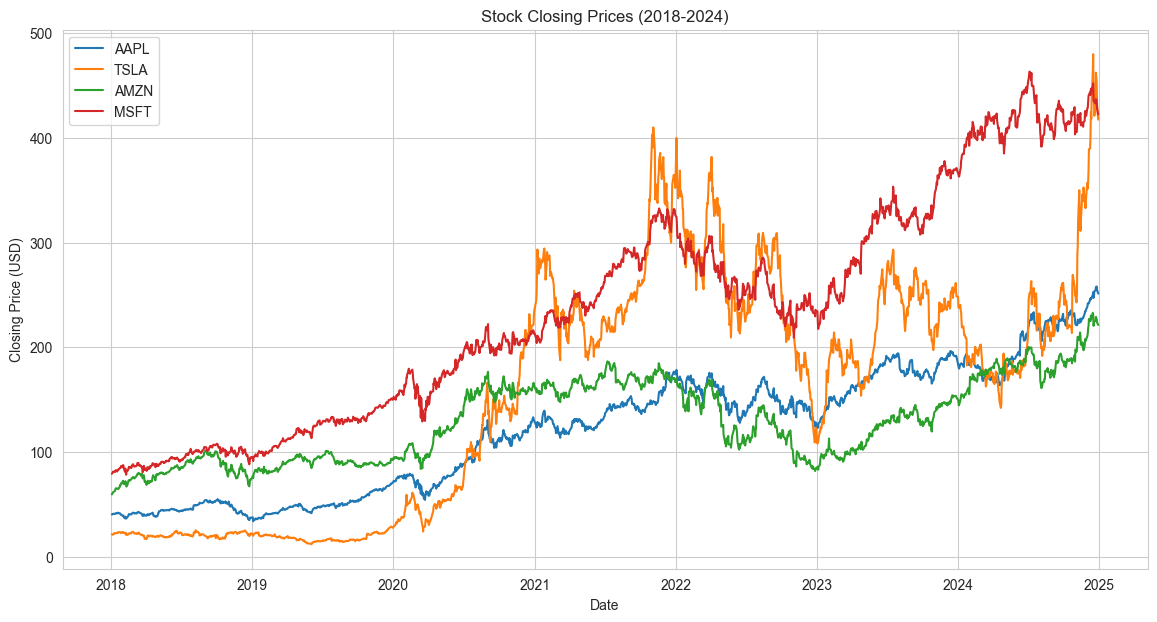

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('whitegrid')

plt.figure(figsize=(14,7))
for company in stock_df['Company'].unique():
    company_data = stock_df[stock_df['Company'] == company]
    plt.plot(company_data['Date'], company_data['Close'], label=company)

plt.title('Stock Closing Prices (2018-2024)')
plt.xlabel('Date')
plt.ylabel('Closing Price (USD)')
plt.legend()
plt.show()


In [17]:
stock_df['Daily_Return'] = stock_df.groupby('Company')['Close'].pct_change()


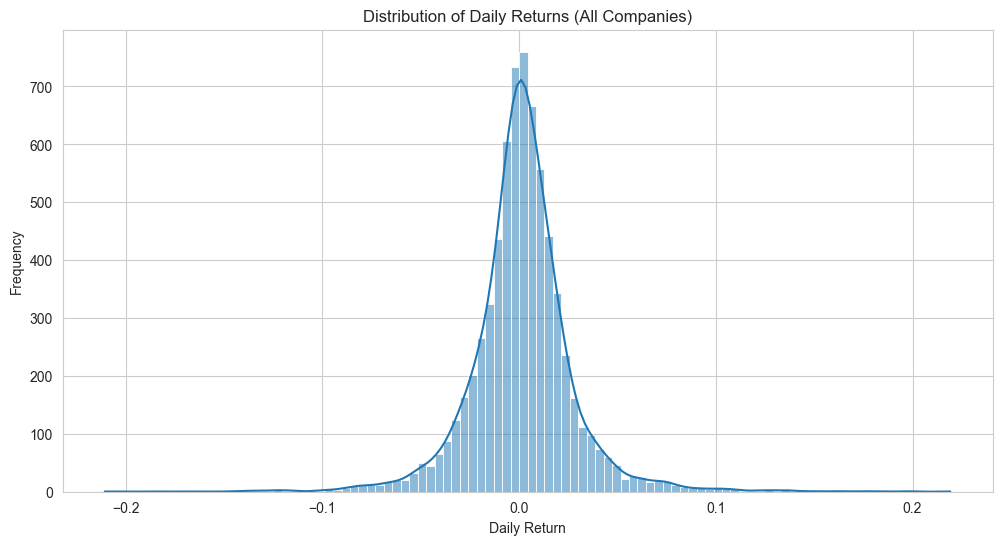

In [18]:
plt.figure(figsize=(12,6))
sns.histplot(stock_df['Daily_Return'].dropna(), bins=100, kde=True)
plt.title('Distribution of Daily Returns (All Companies)')
plt.xlabel('Daily Return')
plt.ylabel('Frequency')
plt.show()


Company      AAPL      AMZN      MSFT      TSLA
Company                                        
AAPL     1.000000  0.786335  0.969423  0.870588
AMZN     0.786335  1.000000  0.819565  0.754263
MSFT     0.969423  0.819565  1.000000  0.796240
TSLA     0.870588  0.754263  0.796240  1.000000


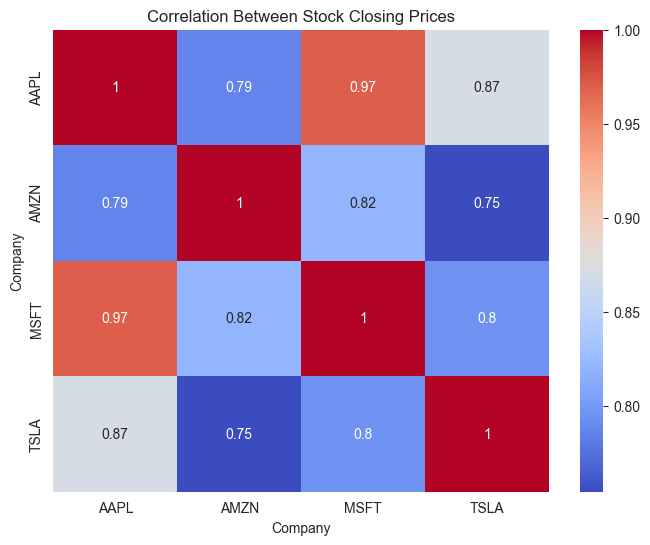

In [19]:

# Pivot data to have companies as columns
pivot_df = stock_df.pivot(index='Date', columns='Company', values='Close')

# Compute correlation
corr_matrix = pivot_df.corr()
print(corr_matrix)

# Visualize correlation
plt.figure(figsize=(8,6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Between Stock Closing Prices')
plt.show()
